**Внимание!** 

Код очень кривой, в скором времени будет отрефакторен до нормального вида 

In [1]:
import pandas as pd 
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
sns.set()

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_first_period = pd.read_excel('agg_stat_first_period.xlsx') 
df_second_period = pd.read_excel('agg_stat_second_period.xlsx')

In [4]:
df_first_period['label'] = '1948-1949' 
df_first_period['period'] = 1948
df_second_period['label'] = '1954-1955'
df_second_period['period'] = 1954

In [7]:
df = pd.concat([df_first_period, df_second_period], axis=0)
df['period'] = df['label'].apply(lambda x: 1948 if x == '1948-1949' else 1954)
df

,Cinema,Screening Days,rating,Adventure,Biography,Comedy,Crime,Drama,Family,Fantasy,...,is_censure,count_movies,screendays_by_year,mean_distrib,rank,seats,soviet_movies,new_movies,label,period
0,Авангард,942,6.066981,37,24,30,3,119,29,11,...,7,212,339.5,4.443396,1,515,151,152,1948-1949,1948
1,Аврора,863,6.203653,29,22,51,3,124,12,7,...,15,219,318.0,3.940639,3,338,183,143,1948-1949,1948
2,Аквариум,415,6.206061,17,7,20,3,51,17,11,...,3,99,139.5,4.191919,2,732,73,86,1948-1949,1948
3,Арс,922,6.040571,13,17,44,3,104,12,8,...,8,175,323.5,5.268571,2,273,148,125,1948-1949,1948
4,Баррикады,963,5.687013,33,22,33,5,121,28,11,...,10,231,337.0,4.168831,2,451,175,161,1948-1949,1948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,Шторм,818,5.565263,25,8,44,5,110,13,3,...,1,190,326.0,4.305263,1,622,114,157,1954-1955,1954
37,Экран жизни,1195,6.114397,34,12,79,10,141,19,4,...,5,257,320.0,4.649805,2,565,193,191,1954-1955,1954
38,Экспресс,1179,5.356877,29,19,63,6,122,21,6,...,2,269,321.0,4.382900,3,253,222,171,1954-1955,1954
39,Эрмитаж,1272,5.743704,32,13,69,8,157,24,6,...,0,270,343.5,4.711111,1,652,164,196,1954-1955,1954


In [8]:
# df['rank'] -= 1

In [6]:
df_second_period['is_censure'].value_counts()

0    16
1     8
5     5
2     5
3     3
4     2
7     2
Name: is_censure, dtype: int64

## Всякие базовые визуализации

In [6]:
df.columns

Index(['Cinema', 'Screening Days', 'rating', 'Adventure', 'Biography',
       'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Thriller', 'War', 'Western', 'Action', 'Adult', 'Animation',
       'Documentary', 'Austria', 'China', 'Czechoslovakia', 'East Germany',
       'France', 'Germany', 'Hungary', 'Italy', 'Kazakhstan', 'Mongolia',
       'Netherlands', 'Norway', 'Soviet Union', 'United Kingdom',
       'United States', 'Albania', 'Argentina', 'Australia', 'Bulgaria',
       'Finland', 'India', 'Japan', 'Mexico', 'North Korea', 'Poland',
       'Romania', 'Russia', 'Spain', 'Sweden', 'West Germany', 'Yugoslavia',
       'is_foreign', 'is_award', 'is_censure', 'count_movies',
       'screendays_by_year', 'mean_distrib', 'rank', 'seats', 'soviet_movies',
       'new_movies', 'label'],
      dtype='object')

In [7]:
columns_genres = ['Adventure', 'Biography',
       'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Thriller', 'War', 'Western', 'Action', 'Adult', 'Animation',
       'Documentary']

In [26]:
columns_countries = ['Austria', 'China', 'Czechoslovakia', 'East Germany',
       'France', 'Germany', 'Hungary', 'Italy', 'Kazakhstan', 'Mongolia',
       'Netherlands', 'Norway', 'Soviet Union', 'United Kingdom',
       'United States', 'Albania', 'Argentina', 'Australia', 'Bulgaria',
       'Finland', 'India', 'Japan', 'Mexico', 'North Korea', 'Poland',
       'Romania', 'Russia', 'Spain', 'Sweden', 'West Germany', 'Yugoslavia']

In [13]:
df['foreign_movies_percentage'] = (df['is_foreign'] / df['count_movies']) * 100  

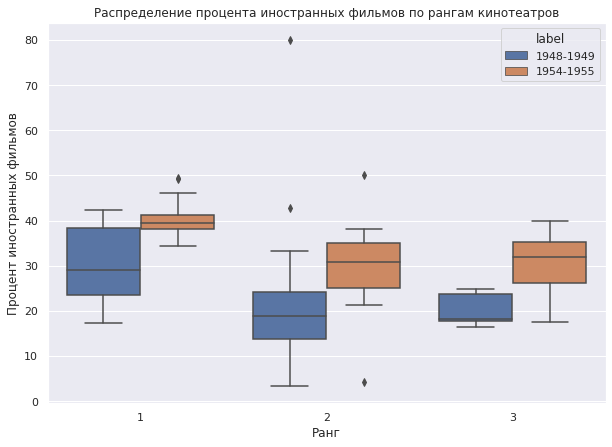

In [16]:
plt.figure(figsize=(10, 7))
box_plot = sns.boxplot(data=df, x='rank', y='foreign_movies_percent', hue='label')
plt.xlabel('Ранг') 
plt.title('Распределение процента иностранных фильмов по рангам кинотеатров')
plt.ylabel('Процент иностранных фильмов')
plt.show()

In [18]:
box_plot.get_figure().savefig('foreign_movies_percent.jpeg')

In [5]:
# # по жанрам 

# plt.figure(figsize=(10, 10))

# x = columns_genres
# count_movies_sum_first = df_first_period['count_movies'].sum() 
# count_movies_sum_second = df_second_period['count_movies'].sum()

# values_first = [] 
# values_second = []

# for genre in columns_genres: 
#     values_first.append((df_first_period[genre].sum() / count_movies_sum_first) * 100) 
#     values_second.append((df_second_period[genre].sum() / count_movies_sum_second) * 100) 
    
# x_axis = np.arange(len(x)) 

# plt.barh(x_axis - 0.2, values_first, 0.4, label='1948-1949') 
# plt.barh(x_axis + 0.2, values_second, 0.4, label='1954-1955')

# plt.yticks(x_axis, x) 
# plt.ylabel('Жанры') 
# plt.xlabel('%') 
# plt.legend() 
# plt.show()

In [59]:
# по жанрам 

# plt.figure(figsize=(20, 7))

# x = columns_genres
# count_movies_sum_first = df_first_period['count_movies'].sum() 
# count_movies_sum_second = df_second_period['count_movies'].sum()

# values_first = [] 
# values_second = []

# for genre in columns_genres: 
#     values_first.append((df_first_period[genre].sum() / count_movies_sum_first) * 100) 
#     values_second.append((df_second_period[genre].sum() / count_movies_sum_second) * 100) 
    
# x_axis = np.arange(len(x)) 

# f = plt.bar(x_axis - 0.2, values_first, 0.4, label='1948-1949') 
# f = plt.bar(x_axis + 0.2, values_second, 0.4, label='1954-1955')

# plt.xticks(x_axis, x, rotation=45) 
# plt.xlabel('Жанры') 
# plt.ylabel('%') 
# plt.title('Жанры фильмов (%)')
# plt.legend() 
# plt.savefig('movies_genres.jpeg')

# plt.show()

In [48]:
df = pd.DataFrame({
    'genre': columns_genres,
    'first': values_first, 
    'second': values_second
})

df.head()

,genre,first,second
0,Adventure,11.729827,12.413634
1,Biography,11.124001,4.571626
2,Comedy,16.060840,22.950253
3,Crime,1.778809,2.959466
4,Drama,55.014179,50.713957


In [49]:
tmp = df[(df['first'] > 3) & (df['second'] > 3)] 
tmp

,genre,first,second
0,Adventure,11.729827,12.413634
1,Biography,11.124001,4.571626
2,Comedy,16.060840,22.950253
4,Drama,55.014179,50.713957
5,Family,8.404228,8.060801
8,History,10.569734,8.705666
9,Music,3.583398,4.157070
10,Musical,11.484919,10.571165
12,Romance,12.438773,20.428374
17,War,21.629286,12.897282


In [50]:
tmp_first = tmp.copy()
tmp_second = tmp.copy() 

tmp_second['first'] = tmp_second['second']

tmp_first['label'] = '1948-1949' 
tmp_second['label'] = '1954-1955' 

concat = pd.concat([tmp_first, tmp_second]).drop(columns=['second'])
concat.head()

,genre,first,label
0,Adventure,11.729827,1948-1949
1,Biography,11.124001,1948-1949
2,Comedy,16.060840,1948-1949
4,Drama,55.014179,1948-1949
5,Family,8.404228,1948-1949


In [85]:
# plt.figure(figsize=(12, 6))
# sns.barplot(data=concat, x='genre', y='first', hue='label')
# plt.xlabel('Жанры') 
# plt.ylabel('%') 
# plt.title('Жанры фильмов (%)')
# plt.savefig('movies_genres.jpeg') 

# plt.show()

In [70]:
# # по странам 

# plt.figure(figsize=(7, 15))

# x = columns_countries
# count_countries_sum_first = sum([df_first_period[country].sum() for country in columns_countries])
# count_countries_sum_second = sum([df_second_period[country].sum() for country in columns_countries])

# values_first = [] 
# values_second = []

# for country in columns_countries: 
#     values_first.append((df_first_period[country].sum() / count_movies_sum_first) * 100) 
#     values_second.append((df_second_period[country].sum() / count_movies_sum_second) * 100) 
    
# x_axis = np.arange(len(x)) 

# f = plt.barh(x_axis - 0.2, values_first, 0.4, label='1948-1949') 
# f = plt.barh(x_axis + 0.2, values_second, 0.4, label='1954-1955')

# plt.yticks(x_axis, x) 
# plt.ylabel('Страны') 
# plt.xlabel('%') 
# plt.title('Страны производства фильмов (%)')
# plt.legend() 
# plt.savefig('movies_countries.jpeg')

# plt.show()

In [74]:
df = pd.DataFrame({
    'country': columns_countries,
    'first': values_first, 
    'second': values_second
})

df.head()

,country,first,second
0,Austria,1.301882,2.660064
1,China,0.000000,1.324275
2,Czechoslovakia,1.405001,3.281898
3,East Germany,0.000000,1.934592
4,France,0.902294,5.826808


In [77]:
tmp = df[(df['first'] > 1.5) | (df['second'] > 1.5)] 
tmp['sum'] = tmp['first'] + tmp['second'] 
tmp = tmp.sort_values(by='sum', ascending=False).drop(columns=['sum'])
tmp

/tmp/ipykernel_5097/460703944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['sum'] = tmp['first'] + tmp['second']


,country,first,second
12,Soviet Union,69.283320,54.352833
5,Germany,15.274555,1.047904
14,United States,2.333076,6.034086
4,France,0.902294,5.826808
7,Italy,2.410415,3.684938
2,Czechoslovakia,1.405001,3.281898
0,Austria,1.301882,2.660064
6,Hungary,1.160093,2.303086
24,Poland,0.489817,1.784892
20,India,0.141789,1.911561


In [78]:
tmp_first = tmp.copy()
tmp_second = tmp.copy() 

tmp_second['first'] = tmp_second['second']

tmp_first['label'] = '1948-1949' 
tmp_second['label'] = '1954-1955' 

concat = pd.concat([tmp_first, tmp_second]).drop(columns=['second'])
concat.head()

,country,first,label
12,Soviet Union,69.283320,1948-1949
5,Germany,15.274555,1948-1949
14,United States,2.333076,1948-1949
4,France,0.902294,1948-1949
7,Italy,2.410415,1948-1949


In [82]:
concat

,country,first,label
12,Soviet Union,69.283320,1948-1949
5,Germany,15.274555,1948-1949
14,United States,2.333076,1948-1949
4,France,0.902294,1948-1949
7,Italy,2.410415,1948-1949
2,Czechoslovakia,1.405001,1948-1949
0,Austria,1.301882,1948-1949
6,Hungary,1.160093,1948-1949
24,Poland,0.489817,1948-1949
20,India,0.141789,1948-1949


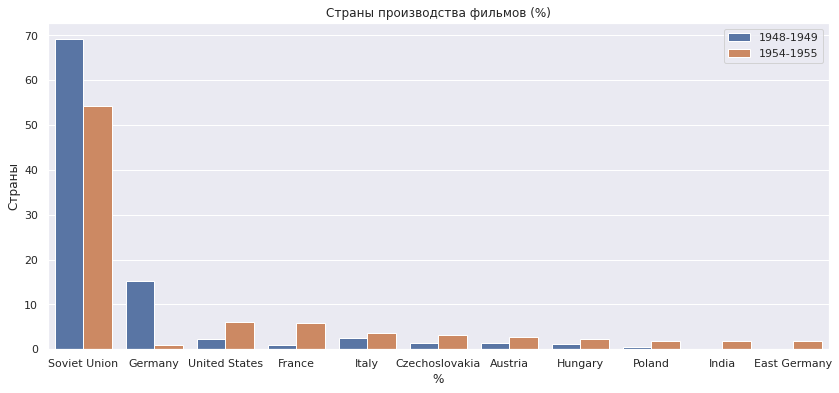

In [84]:
plt.figure(figsize=(14, 6))
sns.barplot(data=concat, x='country', y='first', hue='label') 
plt.ylabel('Страны') 
plt.xlabel('%') 
plt.title('Страны производства фильмов (%)')
plt.legend() 
plt.savefig('movies_countries.jpeg')
plt.show()

### Количество кинотеатров относительно ранга

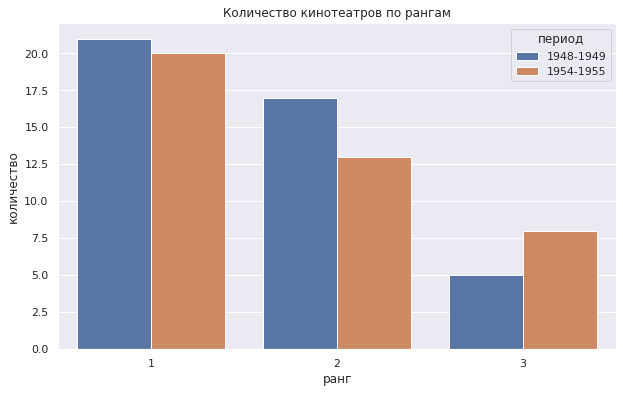

In [12]:
plt.figure(figsize=(10, 6))
df['период'] = df['label'] 
sns.countplot(data=df, x='rank', hue='период')
plt.xlabel('ранг') 
plt.title('Количество кинотеатров по рангам')
plt.ylabel('количество')
plt.savefig('viz/cinemas_per_rank.jpeg')
plt.show()

### Зависимость количества премьер от ранга 

In [86]:
df_first_period['new_movies_percentage'] = (df_first_period['new_movies'] / df_first_period['count_movies']) * 100

In [89]:
tmp_first = df_first_period.copy() 
tmp_first = tmp_first.sort_values(by=['rank', 'seats'], ascending=[False, True]) 

<AxesSubplot: xlabel='Cinema', ylabel='new_movies_percentage'>

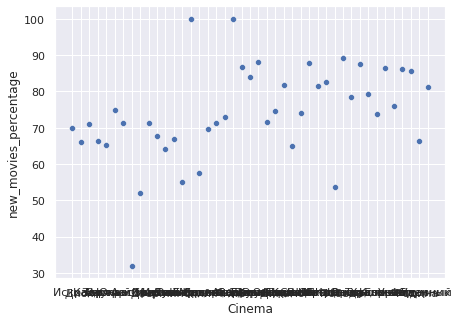

In [91]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=tmp_first, x='Cinema', y='new_movies_percentage')

In [11]:
df['new_movies_percentage'] = (df['new_movies'] / df['count_movies']) * 100

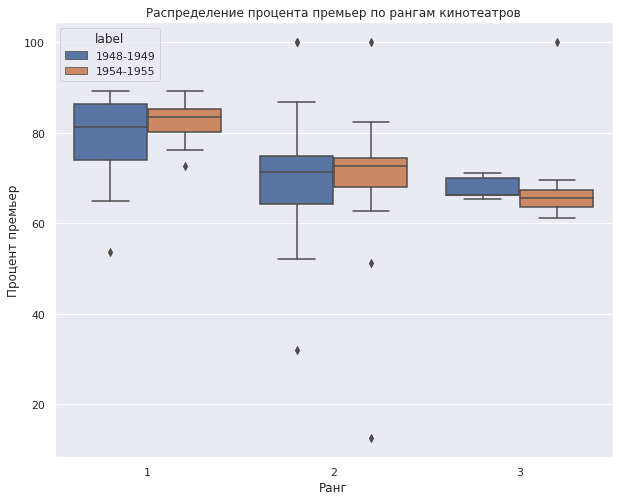

In [101]:
plt.figure(figsize=(10, 8))
box_plot = sns.boxplot(data=df, x='rank', y='new_movies_percentage', hue='label')
plt.xlabel('Ранг') 
plt.title('Распределение процента премьер по рангам кинотеатров')
plt.ylabel('Процент премьер')
plt.savefig('premiers_percent.jpeg')
plt.show()

### Количество экранодней в зависимости от ранга

/tmp/ipykernel_4455/1296372669.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


<Figure size 576x288 with 0 Axes>

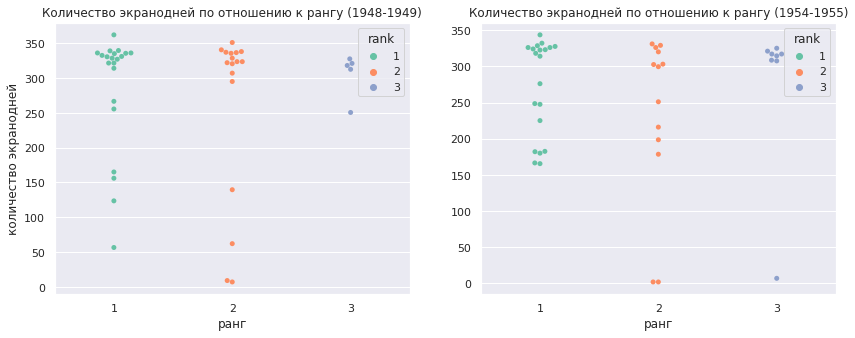

In [28]:
plt.figure(figsize=(8, 4)) 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5)) 

tmp_first = df_first_period.copy() 
tmp_first = tmp_first.sort_values(by=['screendays_by_year'])

ax1.set(ylabel='количество экранодней', 
        xlabel='ранг', 
        title='Количество экранодней по отношению к рангу (1948-1949)')
# ax1.xlabel('ранг') 
# ax1.title('Количество экранодней по отношению к рангу (1948-1949)') 
sns.swarmplot(data=tmp_first, x='rank', y='screendays_by_year', hue='rank', palette="Set2", ax=ax1) 

tmp_second = df_second_period.copy() 
tmp_second = tmp_second.sort_values(by=['screendays_by_year'])

ax2.set(ylabel=' ', 
        xlabel='ранг', 
        title='Количество экранодней по отношению к рангу (1954-1955)')
sns.swarmplot(data=tmp_second, x='rank', y='screendays_by_year', hue='rank', palette="Set2", ax=ax2) 

f.savefig('viz/screendays.jpeg')
f.show()

In [17]:
# import plotly.express as px 

# tmp_first = df_first_period.copy() 
# tmp_first = tmp_first.sort_values(by=['screendays_by_year'])

# tmp_first['dummy_column_for_size'] = 1 
# tmp_first['rank'] = tmp_first['rank'].astype(int)

# fig = px.scatter(tmp_first, 
#                  x='Cinema', 
#                  y='screendays_by_year', 
#                  color='rank',
#                  size='dummy_column_for_size', 
#                  hover_data=['rank'], 
#                  size_max=12, 
#                 labels={'Cinema': 'кинотеатр', 
#                        'screendays_by_year': 'количество экранодней в году'}, 
#                 title='Количество экранодней по отношению к рангу (1948-1949)') 
# fig.show()

In [16]:
# tmp_second = df_second_period.copy() 
# tmp_second = tmp_second.sort_values(by=['screendays_by_year'])

# tmp_second['dummy_column_for_size'] = 1 
# tmp_second['rank'] = tmp_second['rank'].astype(int)

# fig = px.scatter(tmp_second, 
#                  x='Cinema', 
#                  y='screendays_by_year', 
#                  color='rank',
#                  size='dummy_column_for_size', 
#                  hover_data=['rank'], 
#                  size_max=12, 
#                 labels={'Cinema': 'кинотеатр', 
#                        'screendays_by_year': 'количество экранодней в году'}, 
#                 title='Количество экранодней по отношению к рангу (1954-1955)') 
# fig.show()

### Зависимость количества мест и ранга

In [15]:
# import plotly.express as px 

# tmp_first = df_first_period.copy() 
# tmp_first = tmp_first.sort_values(by=['seats'])

# tmp_first['dummy_column_for_size'] = 1 
# tmp_first['rank'] = tmp_first['rank'].astype(int)

# fig = px.scatter(tmp_first, 
#                  x='Cinema', 
#                  y='seats', 
#                  color='rank',
#                  size='dummy_column_for_size', 
#                  hover_data=['rank'], 
#                  size_max=12, 
#                 labels={'seats': 'количество посадочных мест', 
#                        'Cinema': 'кинотеатр'}, 
#                 title='Количество посадочных мест по отношению к рангу (1948-1949)') 

# fig.write_image("viz/seats_first_period.jpeg")
# fig.show()

In [14]:
# tmp_second = df_second_period.copy() 
# tmp_second = tmp_second.sort_values(by=['seats'])

# tmp_second['dummy_column_for_size'] = 1 
# tmp_second['rank'] = tmp_second['rank'].astype(int)

# fig = px.scatter(tmp_second, 
#                  x='Cinema', 
#                  y='seats', 
#                  color='rank',
#                  size='dummy_column_for_size', 
#                  hover_data=['rank'], 
#                  size_max=12, 
#                 labels={'seats': 'количество посадочных мест', 
#                        'Cinema': 'кинотеатр'}, 
#                 title='Количество посадочных мест по отношению к рангу (1954-1955)') 

# fig.write_image("viz/seats_second_period.jpeg")
# fig.show()

### Количество фильмов с премиями и "плохими" отзывами

/tmp/ipykernel_4455/503098182.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


<Figure size 720x360 with 0 Axes>

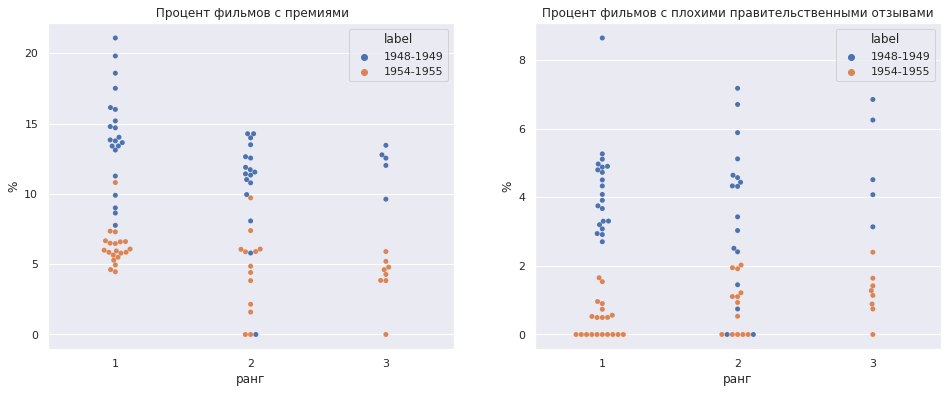

In [30]:
plt.figure(figsize=(10, 5)) 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6)) 

tmp_first = df_first_period.copy() 
# tmp_first = tmp_first.sort_values(by=[''])
df['is_award_percentage'] = (df['is_award'] / df['count_movies']) * 100 
df['is_censure_percentage'] = (df['is_censure'] / df['count_movies']) * 100

ax1.set(ylabel='%', 
        xlabel='ранг', 
        title=' Процент фильмов с премиями')
sns.swarmplot(data=df, x='rank', y='is_award_percentage', hue='label', ax=ax1) 

tmp_second = df_second_period.copy() 
tmp_second = tmp_second.sort_values(by=['screendays_by_year'])

ax2.set(ylabel='%', 
        xlabel='ранг', 
        title='Процент фильмов с плохими правительственными отзывами')
sns.swarmplot(data=df, x='rank', y='is_censure_percentage', hue='label', ax=ax2) 

f.savefig('viz/movies_censure.jpeg')
f.show()

### Среднее количество экранодней 

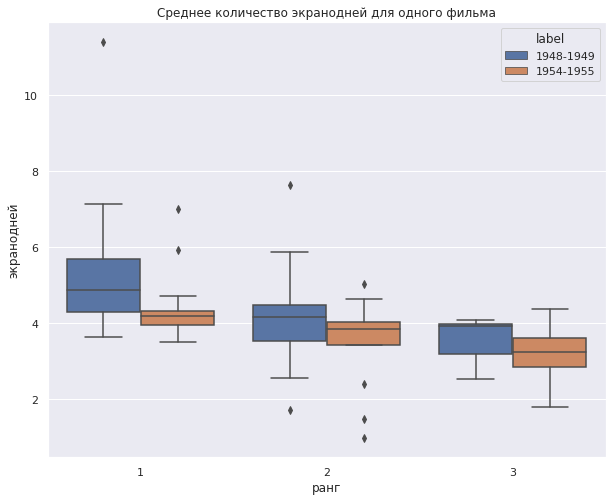

In [5]:
plt.figure(figsize=(10, 8))
box_plot = sns.boxplot(data=df, x='rank', y='mean_distrib', hue='label')
plt.xlabel('ранг') 
plt.title('Среднее количество экранодней для одного фильма')
plt.ylabel('экранодней')
plt.savefig('viz/mean_distrib.jpeg')
plt.show()

## Кластеризация

In [7]:
columns_to_drop = ['rank', 'Screening Days', 'Cinema', 'label']

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
kmeans.fit(df_first_period.drop(columns=['rank', 'Screening Days', 'Cinema', 'label']))

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [9]:
labels = kmeans.predict(df_first_period.drop(columns=columns_to_drop))

In [10]:
from sklearn.metrics import classification_report

print(classification_report(df_first_period['rank'] - 1, labels))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        21
           1       0.62      0.76      0.68        17
           2       0.00      0.00      0.00         5

    accuracy                           0.65        43
   macro avg       0.47      0.49      0.48        43
weighted avg       0.63      0.65      0.64        43



In [11]:
from sklearn.manifold import TSNE 

In [12]:
X_embedded = TSNE(n_components=2).fit_transform(df_first_period.drop(columns=columns_to_drop))

In [32]:
results = pd.DataFrame({
    'x': X_embedded[:, 0], 
    'y': X_embedded[:, 1], 
    'разряд': df_first_period['rank'].astype('category'), 
    'predict': labels + 1 
})

results = results.sort_values('разряд')

In [9]:
import plotly.express as px 

fig = px.scatter(results, x='x', y='y')
fig.show()

In [10]:
# fig1 = px.scatter(results, x='x', y='y', 
#                   color='разряд', 
#                  title='Признаки кинотеатров (1948-1949)')

# fig1.write_image('viz/clusterisation_first_period.jpeg')
# fig1.show()

In [17]:
X_embed_second = TSNE(n_components=2).fit_transform(df_second_period.drop(columns=columns_to_drop))

In [30]:
results_second = pd.DataFrame({
    'x': X_embed_second[:, 0], 
    'y': X_embed_second[:, 1], 
    'разряд': df_second_period['rank'].astype('category')
})

results_second = results_second.sort_values(by='разряд')

In [9]:
# fig1 = px.scatter(results_second, x='x', y='y', 
#                   color='разряд', 
#                  title='Признаки кинотеатров (1954-1955)')

# fig1.write_image('viz/clusterisation_second_period.jpeg')
# fig1.show()

In [8]:
# fig2 = px.scatter(results, x='x', y='y', color='predict')
# fig2.show()

## Классификация

### Catboost

In [31]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
import shap

In [38]:
df_train, df_test = train_test_split(df, 
                                     test_size=0.2, 
                                     stratify=df[['label', 'rank']], 
                                    random_state=42)

In [39]:
X_train = df_train.drop(columns=columns_to_drop) 
X_test = df_test.drop(columns=columns_to_drop) 

y_train = df_train['rank']
y_test = df_test['rank']

In [26]:
model = CatBoostClassifier(iterations=1000, random_state=42)

model.fit(X_train,
          y_train,
          verbose=False)

In [27]:
y_predict = model.predict(X_test) 

In [28]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       1.00      0.88      0.93         8
           2       0.71      0.83      0.77         6
           3       0.67      0.67      0.67         3

    accuracy                           0.82        17
   macro avg       0.79      0.79      0.79        17
weighted avg       0.84      0.82      0.83        17



In [46]:
X = df.drop(columns=columns_to_drop) 
y = df['rank']

In [30]:
feature_importance = model.get_feature_importance(Pool(X, y))

In [31]:
feature_importance

array([1.21780113e+00, 7.39936038e-01, 9.06675299e-01, 8.37972241e-01,
       8.59210029e-01, 1.33126606e+00, 8.65183872e-01, 8.40899518e-01,
       0.00000000e+00, 1.14618222e+00, 1.37666208e+00, 8.65428427e+00,
       2.40705674e-01, 1.33138939e+00, 1.58474725e+00, 6.16073259e+00,
       4.11707062e+00, 3.45215021e-01, 1.20924191e+00, 7.62754701e-01,
       3.19142246e-01, 0.00000000e+00, 4.43001647e-01, 6.99430430e-01,
       2.58969558e+00, 3.03039308e-01, 1.27240852e+00, 2.93068137e-01,
       1.56072561e+00, 1.18523816e+00, 1.36020169e-01, 2.11828404e+00,
       0.00000000e+00, 3.38896769e-01, 6.83892563e-01, 1.48518933e-01,
       2.14666665e+00, 1.57029638e+00, 1.96347640e-01, 1.21090670e-01,
       9.31404672e-01, 5.37945825e-02, 2.93343502e-01, 3.36631203e-01,
       9.77346301e-01, 3.32316182e-01, 3.41005980e-01, 7.03890862e-02,
       2.35714459e+00, 2.25214496e-03, 5.78328599e-02, 0.00000000e+00,
       2.12737846e-01, 6.68099980e-01, 6.65149499e-01, 5.59461267e+00,
      

In [32]:
X.columns

Index(['rating', 'Adventure', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'History', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western', 'Action', 'Adult', 'Animation', 'Documentary', 'Austria',
       'China', 'Czechoslovakia', 'East Germany', 'France', 'Germany',
       'Hungary', 'Italy', 'Kazakhstan', 'Mongolia', 'Netherlands', 'Norway',
       'Soviet Union', 'United Kingdom', 'United States', 'Albania',
       'Argentina', 'Australia', 'Bulgaria', 'Finland', 'India', 'Japan',
       'Mexico', 'North Korea', 'Poland', 'Romania', 'Russia', 'Spain',
       'Sweden', 'West Germany', 'Yugoslavia', 'is_foreign', 'is_award',
       'is_censure', 'count_movies', 'screendays_by_year', 'mean_distrib',
       'seats', 'soviet_movies', 'new_movies', 'period'],
      dtype='object')

In [33]:
len(feature_importance)

65

In [36]:
df_importance_new = pd.DataFrame({
    'feature_name': list(X.columns), 
    'feature_importance': feature_importance
}).sort_values(by='feature_importance', ascending=False)

<AxesSubplot: xlabel='feature_importance', ylabel='feature_name'>

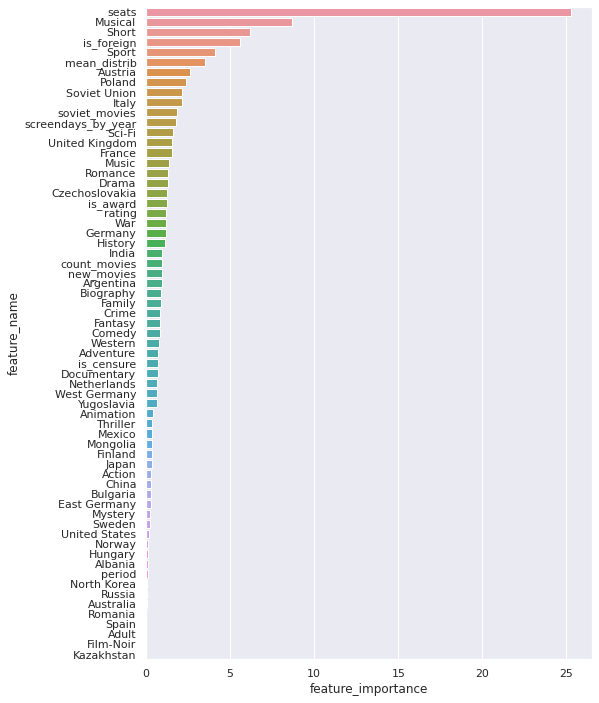

In [37]:
plt.figure(figsize=(8, 12))
sns.barplot(data=df_importance_new, y='feature_name', x='feature_importance', orient='h')

In [ ]:
explainer = shap.TreeExplainer(model, X_test)
shap_values = explainer(X_test)

In [17]:
shap.plots.beeswarm(feature_importance)

ValueError: the beeswarm plot requires Explanation object as the `shap_values` argument

### Logreg

In [33]:
from sklearn.linear_model import LogisticRegression 

In [35]:
clf = LogisticRegression(random_state=42) 
clf.fit(X_train, y_train)

/home/timcha/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [36]:
y_pred = clf.predict(X_test) 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.70      0.88      0.78         8
           2       0.40      0.33      0.36         6
           3       0.50      0.33      0.40         3

    accuracy                           0.59        17
   macro avg       0.53      0.51      0.51        17
weighted avg       0.56      0.59      0.56        17



### XGBoost

In [32]:
from xgboost import XGBClassifier

In [76]:
xgb = XGBClassifier(random_state=17)

In [77]:
xgb.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [44]:
pred = xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.71      0.83      0.77         6
           2       0.67      0.67      0.67         3

    accuracy                           0.82        17
   macro avg       0.79      0.79      0.79        17
weighted avg       0.84      0.82      0.83        17



In [45]:
import shap 

In [48]:
explainer = shap.TreeExplainer(xgb) 

In [56]:
shap_values = explainer.shap_values(X)

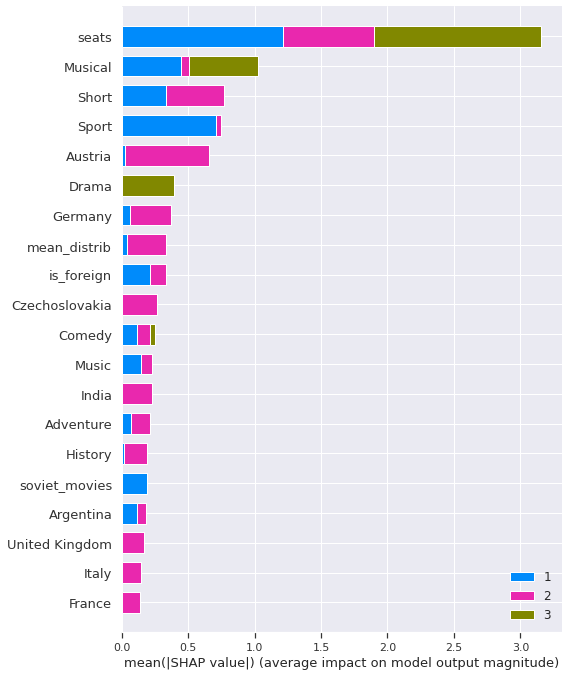

In [57]:
shap.summary_plot(shap_values, X, class_inds="original", class_names=model.classes_)

In [58]:
shap.plots.beeswarm(shap_values)

ValueError: the beeswarm plot requires Explanation object as the `shap_values` argument

In [74]:
# f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(50, 30)) 

# ax1.set_title('Первый разряд')
# ax1 = shap.summary_plot(shap_values[0], X)

# ax2.set_title('Второй разряд')
# ax2 = shap.summary_plot(shap_values[1], X)

# ax3.set_title('Третий разряд')
# ax3 = shap.summary_plot(shap_values[2], X)

# f.show()

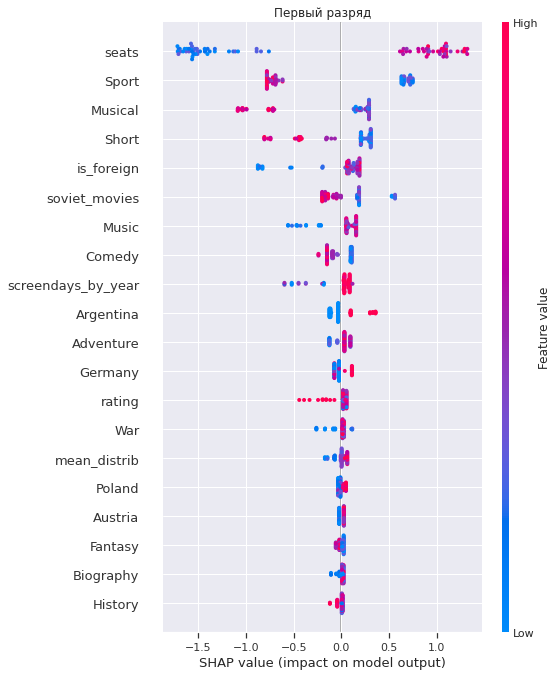

NameError: name 'savefig' is not defined

In [83]:
plt.title('Первый разряд')
shap.summary_plot(shap_values[0], X)
savefig('viz/shap_values_first_rank.jpeg')

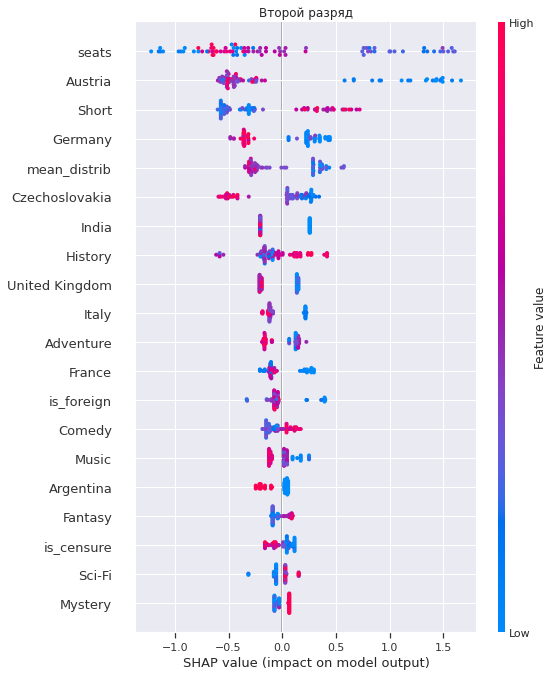

In [79]:
plt.title('Второй разряд') 
shap.summary_plot(shap_values[1], X, )

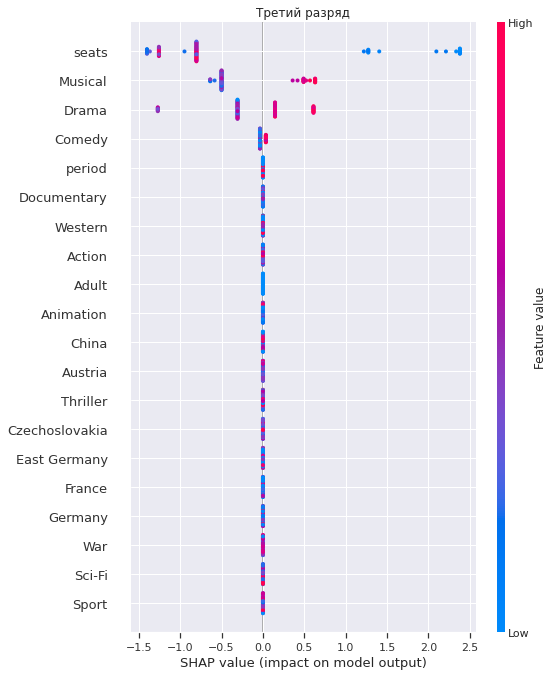

In [80]:
plt.title('Третий разряд')
shap.summary_plot(shap_values[2], X)

## Собираем выбросы 

In [17]:
features_outliers = ['screendays_by_year', 
                     'new_movies_percentage', 
                     'foreign_movies_percentage', 
                     'mean_distrib']

In [72]:
df_outliers_first = pd.DataFrame(columns=['cinema', 'rank', 'period'] + features_outliers)
df_outliers_first.loc[:, 'cinema'] = df_first_period['Cinema'].values

df_outliers_first.head()

,cinema,rank,period,screendays_by_year,new_movies_percentage,foreign_movies_percentage,mean_distrib
0,Авангард,NaN,NaN,NaN,NaN,NaN,NaN
1,Аврора,NaN,NaN,NaN,NaN,NaN,NaN
2,Аквариум,NaN,NaN,NaN,NaN,NaN,NaN
3,Арс,NaN,NaN,NaN,NaN,NaN,NaN
4,Баррикады,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df_outliers_second = pd.DataFrame(columns=['cinema', 'rank', 'period'] + features_outliers)
df_outliers_second.loc[:, 'cinema'] = df_second_period['Cinema'].values

df_outliers_second.head()

,cinema,rank,period,screendays_by_year,new_movies_percentage,foreign_movies_percentage,mean_distrib
0,Авангард,NaN,NaN,NaN,NaN,NaN,NaN
1,Аврора,NaN,NaN,NaN,NaN,NaN,NaN
2,Аквариум,NaN,NaN,NaN,NaN,NaN,NaN
3,Баррикады,NaN,NaN,NaN,NaN,NaN,NaN
4,ВСХВ малый зал,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
for rank in [1, 2, 3]: 
    for label in ['1954-1955']: 
        for feature in features_outliers:
            sample = df[(df['rank'] == rank) & (df['label'] == label)][['Cinema', feature]]
            
            percentile_10 = np.percentile(sample[feature].values, 10) 
            percentile_90 = np.percentile(sample[feature].values, 90) 
            mean = "{:.2f}".format(np.mean(sample[feature]))
            
#             print(f'''{feature}, rank: {rank}, period: {label}
# 25% percentile: {percentile_25}, 75% percentile: {percentile_75} 
# mean: {mean}
# ''')
            
            outliers = sample[(sample[feature] < percentile_10) | (sample[feature] > percentile_90)] 
            
            for i, row in outliers.iterrows():
                cinema = row['Cinema']
                feature_value = "{:.2f}".format(row[feature])
#                 print(df_outliers_first[df_outliers_first['cinema'] == cinema][feature]) 
                
                df_outliers_second[feature][df_outliers_second['cinema'] == cinema] = feature_value
                df_outliers_second['rank'][df_outliers_second['cinema'] == cinema] = rank 
                df_outliers_second['period'][df_outliers_second['cinema'] == cinema] = label

In [81]:
df_outliers_second = df_outliers_second.dropna(how='all', subset=features_outliers)

df_outliers_second = df_outliers_second.sort_values(by='rank') 
df_outliers_second = df_outliers_second.reset_index() 
df_outliers_second = df_outliers_second.drop(columns=['period', 'index']) 

In [82]:
df_outliers_second

,cinema,rank,screendays_by_year,new_movies_percentage,foreign_movies_percentage,mean_distrib
0,им. Моссовета,1,NaN,NaN,34.62,NaN
1,Центральный,1,332.00,NaN,49.13,NaN
2,Художественный,1,NaN,76.15,NaN,7.00
3,Форум,1,NaN,NaN,49.50,5.93
4,Таганский,1,NaN,89.33,NaN,NaN
5,Знамя,1,165.50,NaN,NaN,3.52
6,Сад им. Баумана,1,NaN,89.00,NaN,NaN
7,Перекоп,1,NaN,NaN,34.33,3.85
8,ПКиО Сокольники,1,166.50,NaN,NaN,NaN
9,Эрмитаж,1,343.50,72.59,NaN,NaN


In [77]:
df_outliers_first.to_excel('df_outliers_first.xlsx', index=False)

In [83]:
df_outliers_second.to_excel('df_outliers_second.xlsx', index=False)